# 🧠 Optimization: Where Operational Research Meets Artificial Intelligence

Optimization lies at the heart of both **Operational Research (OR)** and **Artificial Intelligence (AI)**. Whether you're allocating resources in a factory or training a deep learning model, you're solving an optimization problem.

Operational Research provides the mathematical and algorithmic foundations for solving decision problems, often under constraints. Techniques like **Linear Programming**, **Dynamic Programming**, and **Combinatorial Optimization** have long been the toolkit of OR practitioners.

In AI, optimization plays a slightly different but just as crucial role. From **machine learning** to **reinforcement learning** to **deep learning**, almost every algorithm is powered by some form of optimization — especially variants of **gradient descent**.

> 🎯 This notebook aims to bridge both worlds, showing how optimization techniques developed in OR are core to solving AI problems today.

---

## 📚 Table of Contents

### 1. 🧭 Introduction
- What is optimization?
- Optimization in Operational Research:
  - Problem-solving under constraints
  - Tools: Linear Programming, Integer Programming, Network Optimization, etc.
- Optimization in AI:
  - 🔹 **Machine Learning**: minimizing loss functions (e.g., MSE, cross-entropy)
  - 🔹 **Deep Learning**: optimizing neural network parameters
  - 🔹 **Reinforcement Learning**: policy optimization, value function approximation
- 💡 Each section will include a minimal code example demonstrating the role of an optimizer.

---

### 2. 🧮 Types of Optimization Methods

We will explore the following first-order optimization algorithms commonly used in AI:

- Gradient Descent (Batch GD)
- Stochastic Gradient Descent (SGD)
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient (NAG)
- RMSProp
- Adam

Each method will be explained with:
- Mathematical update rules
- Pseudocode
- Visualization of convergence behavior on toy functions

---

### 3. 📐 Gradient Descent & Its Variants — Code & Pseudocode

For Gradient descent optimizer, we will:
- Plot a simple convex function (e.g., `f(x) = x² + 4x + 4`)
- Show the optimizer’s update steps visually
- Provide annotated code and pseudocode

We will also explore:
- 1D and 2D visualizations of gradient descent
- Learning rate sensitivity
- Momentum dynamics

---

### 4. 🧪 Implementing Optimizers in ML, DL, RL

We'll demonstrate how the optimizers are applied in:

- 🟠 **Machine Learning**:
  - Linear regression using Gradient Descent & Adam
- 🔵 **Deep Learning**:
  - Simple neural network classification task trained with Adam and SGD
- 🟢 **Reinforcement Learning**:
  - Q-learning with an optimizer to update Q-table or
  - Policy Gradient methods using Adam to update policies

These examples will show how theoretical optimizers from OR are used in real AI systems.

---

### 5. 🧾 Conclusion

- OR and AI are fundamentally connected through optimization.
- Understanding optimizers helps you both solve traditional OR problems and train powerful AI models.
- Optimization bridges theory and application — from logistics and scheduling to computer vision and robotics.
- 📖 *Further Reading*:
  - Boyd & Vandenberghe – Convex Optimization
  - Sutton & Barto – Reinforcement Learning
  - Goodfellow et al. – Deep Learning

---

> ✅ Stay tuned as we go from simple functions to real AI applications — all through the lens of optimization!

## 🧭 1. Introduction

### 📌 What is Optimization?

**Optimization** is the process of finding the best solution from a set of feasible solutions. In mathematical terms, it's about minimizing (or maximizing) an objective function subject to a set of constraints. The goal is to make a system or decision as effective or functional as possible.

---

### 🏗️ Optimization in Operational Research (OR)

Operational Research is fundamentally about **decision-making under constraints**. It uses optimization techniques to find the most efficient way to allocate limited resources such as time, money, or materials.

#### 💼 Example Applications:
- Scheduling tasks in a factory to minimize idle time.
- Designing transportation networks to minimize delivery costs.
- Allocating budgets across departments for maximum efficiency.

#### 🧰 Common OR Optimization Tools:
- **Linear Programming (LP)** – for problems with linear objectives and constraints.
- **Integer Programming (IP)** – LP where some or all variables must take integer values.
- **Network Optimization** – shortest path, max flow, minimum cost flow.
- **Dynamic Programming** – for sequential decision problems.

These methods often guarantee optimality and are solved using exact algorithms.

---

### 🤖 Optimization in Artificial Intelligence (AI)

In AI, optimization is the backbone of learning and decision-making. Whether it's adjusting weights in a neural network or updating policies in reinforcement learning, the engine behind it all is **optimization** — especially through variants of **gradient descent**.

#### 🔹 Machine Learning (ML)

In ML, the aim is to **minimize a loss function** that measures the error between predictions and actual values.

Example:
- Linear regression minimizes **Mean Squared Error (MSE)**.
- Logistic regression minimizes **Binary Cross-Entropy**.

```python
# Gradient Descent for Linear Regression (sketch)
def loss(w, X, b): return ((X @ w - b) ** 2).mean()
w, b = np.random.randn()
# gradient descent step
w -= alpha * grad(loss)(w)
b -= alpha * grad(loss)(b)
```

---

#### 🔹 Deep Learning (DL)

Deep Learning extends this to models with millions of parameters — like neural networks. Optimizers like **SGD**, **Adam**, and **RMSProp** are used to adjust weights to minimize complex loss surfaces.

```python
# PyTorch example: training step
loss = criterion(output, target)
loss.backward()
optimizer.step()
```

---

#### 🔹 Reinforcement Learning (RL)

In RL, agents **optimize their policy** or value function over time by interacting with the environment.

- **Q-learning**: Optimizes the Q-value function using temporal difference updates.
- **Policy Gradient**: Uses gradient descent to directly improve the policy.

```python
# Policy Gradient Update
policy_loss = -log_prob * reward
optimizer.zero_grad()
policy_loss.backward()
optimizer.step()
```

---

### 💡 What We'll Do

Throughout this notebook, we'll:
- Visualize optimization on simple mathematical functions.
- Write and explain code for each optimizer variant.
- Show how optimization algorithms are applied in ML, DL, and RL — bridging theory (OR) and application (AI).

> Let’s now dive deeper into the various optimization methods starting with Gradient Descent and its variants.


## 🧮 2. Types of Optimization Methods

In Artificial Intelligence, particularly in **machine learning**, **deep learning**, and **reinforcement learning**, optimization is typically carried out using **first-order methods** — algorithms that use the gradient (first derivative) of the loss function to update parameters.

We will explore the most common first-order optimization algorithms used in practice:

---

### 📌 Gradient Descent (Batch Gradient Descent)

```python
# θ = θ - α * ∇J(θ)
theta = theta - alpha * gradient(theta)
```

- Computes gradient over the entire training dataset.
- Accurate but slow for large datasets.

**Pros:** Converges smoothly on convex functions.  
**Cons:** Computationally expensive for big data.

---

### 📌 Stochastic Gradient Descent (SGD)

```python
# θ = θ - α * ∇J(θ; xᵢ, yᵢ)
theta = theta - alpha * gradient(theta, x_i, y_i)
```

- Updates parameters using one sample at a time.
- Faster but introduces noise in the updates.

**Pros:** Fast, allows for online learning.  
**Cons:** High variance, may not converge smoothly.

---

### 📌 Mini-Batch Gradient Descent

```python
# θ = θ - α * (1/m) * ∑ ∇J(θ; xⱼ, yⱼ) for j in batch
theta = theta - alpha * average_gradient(theta, batch)
```

- Compromise between batch and SGD.
- Processes a small batch of data points per update.

**Pros:** Efficient computation using matrix operations.  
**Cons:** Still requires hyperparameter tuning (batch size, learning rate).

---

### 📌 Momentum

```python
# v = β * v - α * ∇J(θ)
# θ = θ + v
v = beta * v - alpha * gradient(theta)
theta = theta + v
```

- Adds velocity to the updates, allowing it to move faster in relevant directions and dampen oscillations.

**Pros:** Faster convergence and smoother updates.  
**Cons:** Additional parameter `beta` (momentum term).

---

### 📌 Nesterov Accelerated Gradient (NAG)

```python
# v = β * v - α * ∇J(θ - β * v)
# θ = θ + v
lookahead = theta - beta * v
v = beta * v - alpha * gradient(lookahead)
theta = theta + v
```

- Looks ahead by computing the gradient at the estimated next position.
- Leads to better convergence in many cases.

**Pros:** Smarter acceleration than classical momentum.  
**Cons:** Slightly more complex gradient calculation.

---

### 📌 RMSProp

```python
# s = ρ * s + (1 - ρ) * (∇J(θ))²
# θ = θ - α / sqrt(s + ε) * ∇J(θ)
s = rho * s + (1 - rho) * gradient(theta)**2
theta = theta - alpha / (np.sqrt(s) + epsilon) * gradient(theta)
```

- Adapts the learning rate for each parameter.
- Controls oscillations in vertical directions.

**Pros:** Works well in non-stationary settings.  
**Cons:** Learning rate scheduling still needed.

---

### 📌 Adam (Adaptive Moment Estimation)

```python
# m = β₁ * m + (1 - β₁) * ∇J(θ)
# v = β₂ * v + (1 - β₂) * (∇J(θ))²
# m_hat = m / (1 - β₁ᵗ)
# v_hat = v / (1 - β₂ᵗ)
# θ = θ - α * m_hat / (sqrt(v_hat) + ε)

m = beta1 * m + (1 - beta1) * gradient(theta)
v = beta2 * v + (1 - beta2) * gradient(theta)**2

m_hat = m / (1 - beta1**t)
v_hat = v / (1 - beta2**t)

theta = theta - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
```

- Combines Momentum and RMSProp.
- One of the most popular optimizers in DL.

**Pros:** Fast, adaptive, handles sparse gradients.  
**Cons:** May not converge to true optima in some settings.

---

### 📊 Visualizing Convergence Behavior

For each optimizer above, we will:
- Use a simple convex function like `f(x) = x**2 + 4*x + 4`
- Show step-by-step descent visually on the curve
- Animate or plot 1D/2D paths using arrows and contour plots

> 🚀 Next, we will implement each method with both **pseudocode** and **live Python examples** to see how they behave in practice.


## 📐 3. Gradient Descent & Its Variants — Code & Pseudocode

In this section, we bring the theory to life. We'll apply each optimizer to a simple convex function and visualize how it updates parameters over time.

---

### 🎯 Objective Function

We’ll use a basic 1D quadratic function:

```python
def f(x):
    return x**2 + 4*x + 4

def grad_f(x):
    return 2*x + 4
```

This function has a global minimum at `x = -2`.

---

### 🔄 What We’ll Do

For Gradient descent optimizer, we will:
- Plot the function `f(x)` and show the **update steps** from a starting point (e.g., `x = 5`).
- Annotate each step using arrows and scatter points.
- Show how the path changes with different **learning rates**.
- Observe how **momentum** affects convergence behavior.
- Extend to **2D visualizations** for functions like `f(x, y) = x² + y²`.

#### 🧮 Pseudocode :

```text
Initialize x
For i in range(num_steps):
    grad = derivative of f at x
    x = x - learning_rate * grad
```

#### 🤖 Code :

/tmp/ipython-input-8-310065942.py:40: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



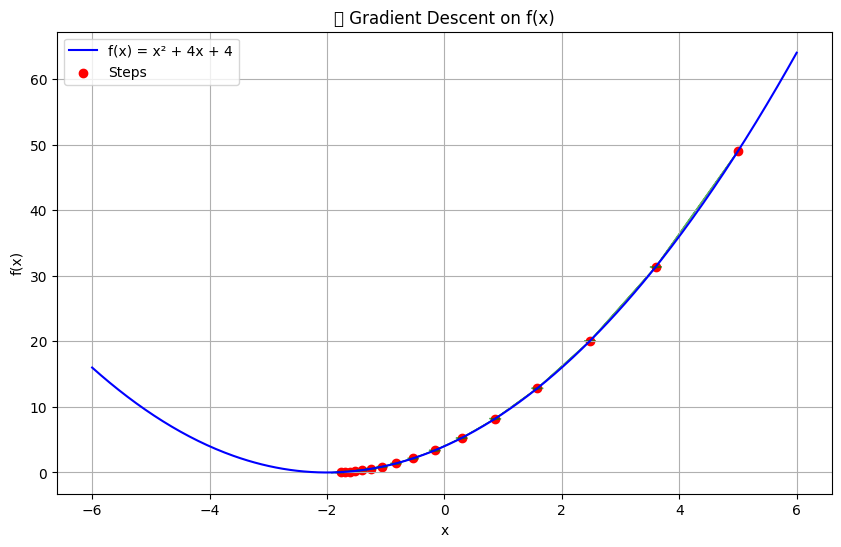

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return x**2 + 4*x + 4

def grad_f(x):
    return 2*x + 4

# Gradient Descent parameters
alpha = 0.1               # learning rate
x_start = 5               # initial point
num_steps = 15            # number of iterations

# Run gradient descent
x_vals = [x_start]
for _ in range(num_steps):
    x_new = x_vals[-1] - alpha * grad_f(x_vals[-1])
    x_vals.append(x_new)

# Plotting the function
x = np.linspace(-6, 6, 400)
y = f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x² + 4x + 4", color='blue')
plt.scatter(x_vals, [f(xi) for xi in x_vals], color='red', label='Steps')
for i in range(len(x_vals) - 1):
    plt.arrow(x_vals[i], f(x_vals[i]),
              x_vals[i+1] - x_vals[i],
              f(x_vals[i+1]) - f(x_vals[i]),
              head_width=0.2, head_length=0.2,
              fc='green', ec='green', alpha=0.6)
plt.title("📉 Gradient Descent on f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
# Save the figure
plt.savefig("gradient_descent_plot.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-9-1583856135.py:48: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



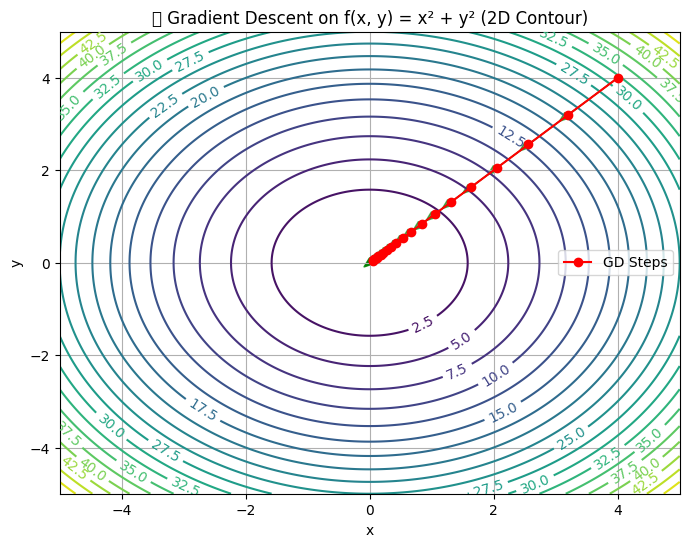

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D function and its gradient
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Gradient Descent parameters
alpha = 0.1
x0 = np.array([4.0, 4.0])
num_steps = 20

# Run Gradient Descent
points = [x0]
for _ in range(num_steps):
    grad = grad_f(*points[-1])
    next_point = points[-1] - alpha * grad
    points.append(next_point)

points = np.array(points)

# Plotting the contour and steps
x = y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours)
plt.plot(points[:, 0], points[:, 1], 'ro-', label='GD Steps')

# Arrows showing update direction
for i in range(len(points) - 1):
    plt.arrow(points[i, 0], points[i, 1],
              points[i+1, 0] - points[i, 0],
              points[i+1, 1] - points[i, 1],
              head_width=0.15, head_length=0.2, fc='green', ec='green', alpha=0.6)

plt.title("📉 Gradient Descent on f(x, y) = x² + y² (2D Contour)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
# Save the figure
plt.savefig("gradient_descent_on_f(x,y).png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-10-2354909531.py:52: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



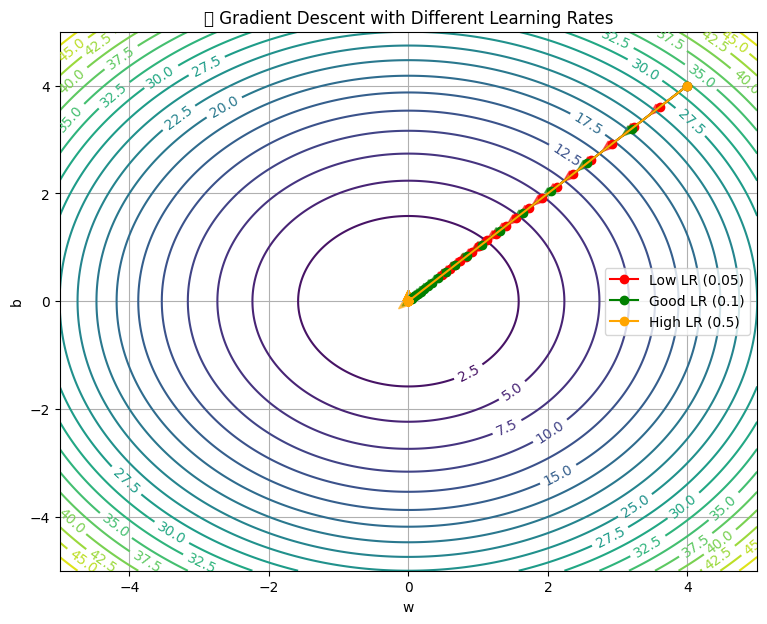

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and gradient
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# GD optimizer runner
def run_gd(start, alpha, steps):
    points = [start]
    for _ in range(steps):
        grad = grad_f(*points[-1])
        next_point = points[-1] - alpha * grad
        points.append(next_point)
    return np.array(points)

# Settings
x0 = np.array([4.0, 4.0])
steps = 20
learning_rates = [0.05, 0.1, 0.5]
colors = ['red', 'green', 'orange']
labels = ['Low LR (0.05)', 'Good LR (0.1)', 'High LR (0.5)']

# Prepare contour plot
x = y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(9, 7))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours)
plt.title("📊 Gradient Descent with Different Learning Rates")
plt.xlabel("w"); plt.ylabel("b")
plt.grid(True)

# Plot each learning rate's trajectory
for alpha, color, label in zip(learning_rates, colors, labels):
    pts = run_gd(x0, alpha, steps)
    plt.plot(pts[:, 0], pts[:, 1], 'o-', color=color, label=label)
    for i in range(len(pts) - 1):
        plt.arrow(pts[i, 0], pts[i, 1],
                  pts[i+1, 0] - pts[i, 0],
                  pts[i+1, 1] - pts[i, 1],
                  head_width=0.15, head_length=0.2,
                  fc=color, ec=color, alpha=0.6)

plt.legend()
# Save the figure
plt.savefig("gradient_descent_with_different_LR.png", dpi=300, bbox_inches='tight')
plt.show()

## 🧪 4. Implementing Optimizers in ML, DL, RL

We now move from toy functions to **real-world AI systems**.

In this section, we’ll demonstrate how optimization — powered by algorithms like **Gradient Descent** and **Adam** — is applied across three major AI domains:

---

### 🟠 Machine Learning (Supervised Learning)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# 1. 🔢 Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=1, noise=25)
y = y.reshape(-1, 1)

# 2. ⚙️ Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train)

# Add bias term to input
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# 3. 🎯 Gradient Descent Initialization
theta = np.random.randn(2, 1)
alpha = 0.1
n_iterations = 50
m = len(X_b)
losses = []
theta_history = []

# 4. 🚀 Gradient Descent Loop
for iteration in range(n_iterations):
    y_pred = X_b.dot(theta)
    error = y_pred - y_train_scaled
    loss = (error ** 2).mean()
    losses.append(loss)

    gradients = (2/m) * X_b.T.dot(error)
    theta -= alpha * gradients

    theta_history.append(theta.copy())

# 6. 📊 Dynamic Plotly Animation — Loss Curve
frames_loss = []
x_vals_loss, y_vals_loss = [], []

for i in range(len(losses)):
    x_vals_loss.append(i)
    y_vals_loss.append(losses[i])
    frames_loss.append(go.Frame(
        data=[go.Scatter(x=x_vals_loss.copy(), y=y_vals_loss.copy(), mode='lines+markers', name='Loss',
                         line=dict(color='mediumpurple'))],
        name=str(i)
    ))

fig_loss = go.Figure(
    data=[go.Scatter(x=[0], y=[losses[0]], mode='lines+markers', name='Loss', line=dict(color='mediumpurple'))],
    layout=go.Layout(
        title="🎞️ Loss Curve Animation (Gradient Descent)",
        xaxis=dict(title="Iteration", range=[0, len(losses)]),
        yaxis=dict(title="Loss (MSE)", range=[min(losses)*0.95, max(losses)*1.05]),
        updatemenus=[dict(type="buttons", showactive=False, buttons=[
            dict(label="▶ Play", method="animate",
                 args=[None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}]),
            dict(label="⏸ Pause", method="animate",
                 args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
        ])]
    ),
    frames=frames_loss
)
fig_loss.update_layout(template="plotly_white", height=450)
fig_loss.show()

# 7. 🎬 Dynamic Plotly Animation — Line Fitting
frames_line = []
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_scaled = scaler_X.transform(x_vals)

for i, theta in enumerate(theta_history):
    b_scaled, w_scaled = theta[0][0], theta[1][0]
    w = (scaler_y.scale_[0] / scaler_X.scale_[0]) * w_scaled
    b = scaler_y.inverse_transform([[b_scaled]])[0] - w * scaler_X.mean_

    y_line = w * x_vals + b
    line = go.Scatter(x=x_vals.flatten(), y=y_line.flatten(), mode='lines',
                      line=dict(color='red', width=3), name=f"Iteration {i}")
    scatter = go.Scatter(x=X.flatten(), y=y.flatten(), mode='markers',
                         marker=dict(color='gray', size=6), name="Training Data")
    frames_line.append(go.Frame(data=[scatter, line], name=str(i)))

# Initial line
init_theta = theta_history[0]
b_scaled, w_scaled = init_theta[0][0], init_theta[1][0]
w = (scaler_y.scale_[0] / scaler_X.scale_[0]) * w_scaled
b = scaler_y.inverse_transform([[b_scaled]])[0] - w * scaler_X.mean_
init_y_line = w * x_vals + b

fig_line = go.Figure(
    data=[
        go.Scatter(x=X.flatten(), y=y.flatten(), mode='markers',
                   marker=dict(color='gray', size=6), name="Training Data"),
        go.Scatter(x=x_vals.flatten(), y=init_y_line.flatten(), mode='lines',
                   line=dict(color='red', width=3), name="Initial Line")
    ],
    layout=go.Layout(
        title="🎞️ Line Fitting Animation (Gradient Descent)",
        xaxis_title="X",
        yaxis_title="y",
        updatemenus=[dict(type="buttons", showactive=False, buttons=[
            dict(label="▶ Play", method="animate",
                 args=[None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}]),
            dict(label="⏸ Pause", method="animate",
                 args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
        ])]
    ),
    frames=frames_line
)

fig_line.update_layout(template="plotly_white", height=500)
fig_line.show()

# Save animated loss curve
fig_loss.write_html("animated_loss_curve.html")

# Save animated line fitting
fig_line.write_html("animated_line_fitting.html")

### 🔵 Deep Learning (Neural Networks)

Using **PyTorch**, we'll train a **simple feedforward neural network** on a classification task (e.g., Iris or MNIST subset).

In [12]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleNN()
criterion = nn.CrossEntropyLoss()

# Custom Adam parameters
alpha = 0.01      # learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize moment estimates
m = {}
v = {}
for name, param in model.named_parameters():
    if param.requires_grad:
        m[name] = torch.zeros_like(param.data)
        v[name] = torch.zeros_like(param.data)

# Training loop
n_epochs = 100
loss_history = []

for epoch in range(1, n_epochs + 1):
    model.train()
    total_loss = 0

    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        model.zero_grad()
        loss.backward()

        # Manual Adam optimizer
        for name, param in model.named_parameters():
            if param.grad is None: continue
            grad = param.grad.data

            # Update biased first moment estimate
            m[name] = beta1 * m[name] + (1 - beta1) * grad
            # Update biased second raw moment estimate
            v[name] = beta2 * v[name] + (1 - beta2) * grad.pow(2)

            # Compute bias-corrected estimates
            m_hat = m[name] / (1 - beta1 ** epoch)
            v_hat = v[name] / (1 - beta2 ** epoch)

            # Update parameters
            param.data -= alpha * m_hat / (v_hat.sqrt() + epsilon)

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)

# Build animation frames
frames = []
x_vals = []
y_vals = []

for i in range(len(loss_history)):
    x_vals.append(i)
    y_vals.append(loss_history[i])
    frames.append(go.Frame(
        data=[go.Scatter(x=x_vals.copy(), y=y_vals.copy(), mode='lines+markers', name='Loss',
                         line=dict(color='orange'))],
        name=str(i)
    ))

# Initialize the base plot
fig = go.Figure(
    data=[go.Scatter(x=[0], y=[loss_history[0]], mode='lines+markers', name='Loss', line=dict(color='orange'))],
    layout=go.Layout(
        title="Training Loss Evolution for MLP - Custom Adam on Iris Dataset",
        xaxis=dict(title="Epoch", range=[0, len(loss_history)]),
        yaxis=dict(title="Loss", range=[min(loss_history)*0.95, max(loss_history)*1.05]),
        updatemenus=[dict(type="buttons", showactive=False, buttons=[
            dict(label="▶ Play", method="animate", args=[None, {"frame": {"duration": 100, "redraw": True}, "fromcurrent": True}]),
            dict(label="⏸ Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
        ])]
    ),
    frames=frames
)

fig.update_layout(template="plotly_white", height=500)
fig.show()

# Save animated loss curve
fig.write_html("animated_loss_curve_for_MLP_with_costum_Adam.html")

### 🟢 Reinforcement Learning (RL)

#### 1. **Q-learning**:
- Custom Q-table update (e.g., in `FrozenLake-v1`)
- Use learning rate directly in update rule (manual optimizer)

### 🧠 Temporal Difference (TD) Learning & Optimization

Q-learning is a classic example of **Temporal Difference (TD) learning**, a central method in reinforcement learning that combines ideas from **Monte Carlo learning** and **dynamic programming**.

At the heart of Q-learning lies the **TD error**, which measures the discrepancy between the current estimate and a better-informed estimate of future reward:

```python
TD_target = reward + gamma * max(Q[next_state])
TD_error  = TD_target - Q[state, action]
Q[state, action] += alpha * TD_error
```

#### ✅ Why is this an Optimization Method?

Even though Q-learning doesn't perform gradient descent in the classical sense, it still embodies the **essence of optimization**:

- The **TD error** acts as a feedback signal, much like a gradient, pointing in the direction to improve our Q-value estimate.
- The **learning rate** `alpha` controls the step size — much like in gradient-based optimizers.
- Over many iterations, Q-learning **minimizes the expected TD error**, converging to the optimal Q-function under certain conditions.

This makes Q-learning a form of **bootstrapped stochastic optimization** — it updates estimates using other learned estimates instead of waiting for full returns like in Monte Carlo methods.

#### 📌 Key Takeaways:

- **TD Error**: Plays a role analogous to a gradient.
- **Learning Rate (`alpha`)**: Acts as a manual optimizer.
- **No explicit loss function**: The optimization is implicit.
- **Bootstrapping**: Q-values are updated using other Q-values.

Thus, Temporal Difference methods like Q-learning offer a powerful alternative to traditional optimization, particularly well-suited to **sequential decision-making problems** in unknown environments.


In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import gym
import matplotlib.pyplot as plt

# Alias np.bool8 to a valid boolean type to avoid Gym errors
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

# Create FrozenLake environment (non-slippery for simplicity)
env = gym.make("CliffWalking-v0")

n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize Q-table
Q = np.random.uniform(-10, 10, (n_states, n_actions))

# Hyperparameters
alpha = 0.1         # learning rate (manual optimizer)
gamma = 0.99        # discount factor
epsilon = 1.0  # start with high exploration
# Define exploration range
epsilon_max = 1.0
epsilon_min = 0.3
decay_rate = 5e-4  # smaller = slower decay
n_episodes = 1000

reward_history = []

# Training loop
for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # ε-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, _ = env.step(action)

        # Q-learning update
        best_next_action = np.max(Q[next_state])
        td_target = reward + gamma * best_next_action
        td_error = td_target - Q[state, action]
        Q[state, action] += alpha * td_error

        state = next_state
        total_reward += reward

    reward_history.append(total_reward)

    # SLOW epsilon decay — once per episode
    epsilon = epsilon_min + (epsilon_max - epsilon_min) * np.exp(-decay_rate * episode)

# Build cumulative data per frame
frames = []
x_vals = []
y_vals = []

for i in range(len(reward_history)):
    x_vals.append(i)
    y_vals.append(reward_history[i])
    frames.append(go.Frame(
        data=[
            go.Scatter(x=x_vals.copy(), y=y_vals.copy(), mode='lines+markers', name="Reward",
                       line=dict(color='royalblue'))
        ],
        name=str(i)
    ))

# Create the base figure
fig = go.Figure(
    data=[go.Scatter(x=[0], y=[reward_history[0]], mode='lines+markers', name="Reward", line=dict(color='royalblue'))],
    layout=go.Layout(
        title="🏆 Q-learning Performance on FrozenLake<br><sub>TD Error Optimization, ε-Greedy Strategy</sub>",
        xaxis=dict(title="Episode", range=[0, len(reward_history)]),
        yaxis=dict(title="Reward", range=[min(reward_history), max(reward_history) + 1]),
        updatemenus=[dict(type="buttons", showactive=False, buttons=[
            dict(label="Play", method="animate", args=[None, {"frame": {"duration": 10, "redraw": True}, "fromcurrent": True}]),
            dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
        ])]
    ),
    frames=frames
)

fig.update_layout(template='plotly_white', height=500)
fig.show()

# Save animated loss curve
fig.write_html("Q_learning_performance_TD_error.html")

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning:

WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.

/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning:

WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.



#### Vanilla Policy Gradient :

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



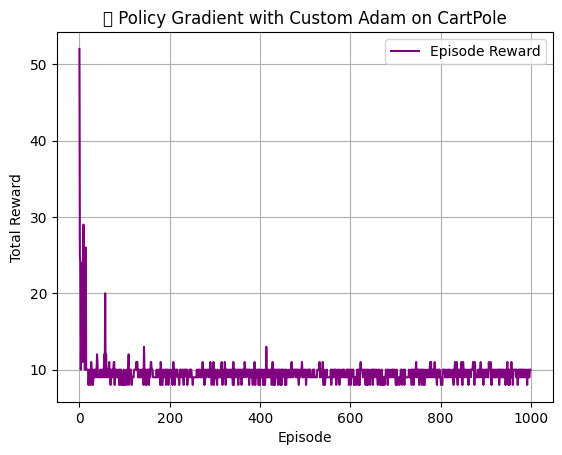

In [14]:
import gym
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set seed
torch.manual_seed(42)
np.random.seed(42)

# Create CartPole environment
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
n_actions = env.action_space.n

# Policy network (2-layer MLP)
class PolicyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim, 128)
        self.fc2 = nn.Linear(128, n_actions)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.softmax(self.fc2(x), dim=1)

policy = PolicyNet()

# Custom Adam parameters
alpha = 0.01
beta1, beta2 = 0.9, 0.999
eps = 1e-8
m, v = {}, {}
for name, param in policy.named_parameters():
    m[name] = torch.zeros_like(param.data)
    v[name] = torch.zeros_like(param.data)

def custom_adam_step(params, grads, t):
    for name, param in params:
        if grads[name] is None:
            continue
        g = grads[name]

        m[name] = beta1 * m[name] + (1 - beta1) * g
        v[name] = beta2 * v[name] + (1 - beta2) * g.pow(2)

        m_hat = m[name] / (1 - beta1 ** t)
        v_hat = v[name] / (1 - beta2 ** t)

        param.data += alpha * m_hat / (v_hat.sqrt() + eps)

# REINFORCE algorithm
def choose_action(policy, state):
    state = np.array(state, dtype=np.float32)       # shape: (4,)
    state_tensor = torch.from_numpy(state).unsqueeze(0)  # shape: (1, 4)
    probs = policy(state_tensor)
    dist = torch.distributions.Categorical(probs)
    action = dist.sample()
    return action.item(), dist.log_prob(action)


n_episodes = 1000
gamma = 0.99
reward_history = []

for episode in range(1, n_episodes + 1):
    state = env.reset()
    log_probs = []
    rewards = []

    states = []
    done = False
    while not done:
        states.append(state)
        action, log_prob = choose_action(policy, state)
        next_state, reward, done, _ = env.step(action)

        log_probs.append(log_prob)
        rewards.append(reward)

        state = next_state

    # Update baseline (moving average of returns)
    baseline = np.mean(reward_history[-100:]) if len(reward_history) >= 100 else 0

    # Compute returns (discounted rewards)
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)
    returns = torch.tensor(returns, dtype=torch.float32)

    # Subtract baseline
    returns -= baseline
    returns = (returns - returns.mean()) / (returns.std() + 1e-9)

    # Compute loss with entropy regularization
    loss = 0
    entropy = 0
    for log_prob, G, state in zip(log_probs, returns, states):
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        probs = policy(state_tensor)
        dist = torch.distributions.Categorical(probs)
        entropy += dist.entropy()
        loss += -log_prob * G

    beta = 0.01  # entropy weight
    loss = loss - beta * entropy

    # Backward pass
    policy.zero_grad()
    loss.backward()

    # Collect grads
    grads = {name: param.grad for name, param in policy.named_parameters()}

    # Update parameters with custom Adam
    custom_adam_step(policy.named_parameters(), grads, episode)

    total_reward = sum(rewards)
    reward_history.append(total_reward)

# Plot rewards
plt.plot(reward_history, label='Episode Reward', color='purple')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("📈 Policy Gradient with Custom Adam on CartPole")
plt.grid(True)
plt.legend()
plt.show()

### 🧾 Conclusion

Operational Research (OR) and Artificial Intelligence (AI) are fundamentally connected through the concept of **optimization**.

Whether it's:
- Solving a scheduling problem with **linear programming**
- Training a neural network with **gradient descent**
- Updating policies in **reinforcement learning** using **TD learning**

...all of these are, at their core, **optimization problems**.

By understanding optimizers — from basic Gradient Descent to advanced methods like Adam — you gain a powerful toolkit that applies across:

- Traditional OR models (e.g., logistics, supply chain, queuing)
- Machine Learning & Deep Learning (e.g., regression, classification, image tasks)
- Reinforcement Learning (e.g., game agents, robotics, simulation)

Optimization is the bridge between **mathematical theory** and **real-world AI applications**.

---

### 📖 Further Reading

- *Convex Optimization* by **Stephen Boyd & Lieven Vandenberghe**
- *Reinforcement Learning: An Introduction* by **Sutton & Barto**
- *Deep Learning* by **Ian Goodfellow, Yoshua Bengio, and Aaron Courville**